In [16]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('bmi.csv')

In [4]:
df.head()

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


In [5]:
df.shape

(500, 4)

In [6]:
df.dtypes

Gender    object
Height     int64
Weight     int64
Index      int64
dtype: object

In [7]:
df.Gender.nunique()

2

In [8]:
df.Gender.unique()

array(['Male', 'Female'], dtype=object)

In [9]:
plt.style.use('ggplot')

Text(0, 0.5, 'Frequency')

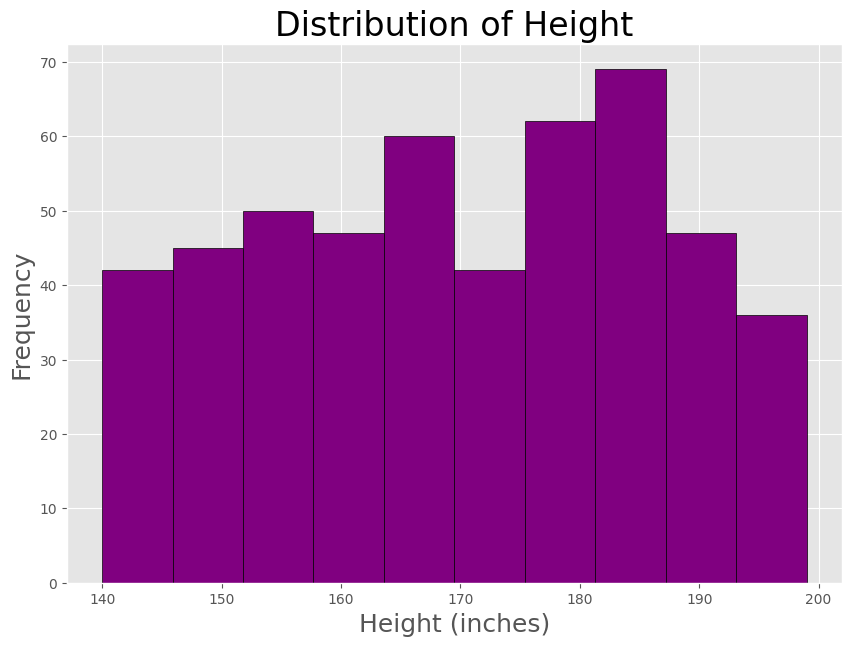

In [24]:
df.Height.plot(kind='hist', color='purple', edgecolor='black', figsize=(10,7))
plt.title("Distribution of Height", size=24)
plt.xlabel('Height (inches)', size=18)
plt.ylabel('Frequency', size=18)


Text(0, 0.5, 'Frequency')

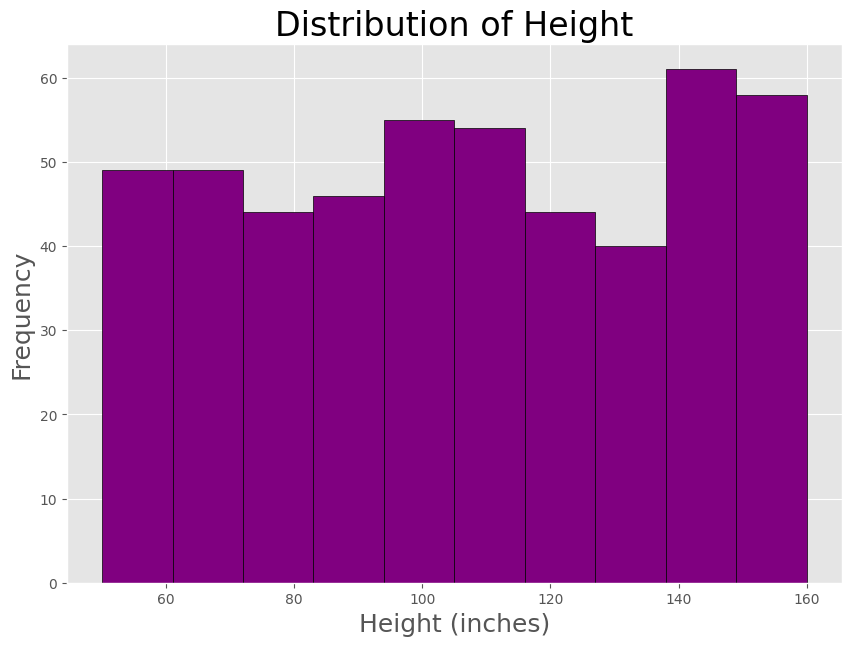

In [25]:
df.Weight.plot(kind='hist',color='purple',edgecolor='black',figsize=(10,7))
plt.title("Distribution of Height", size=24)
plt.xlabel('Height (inches)', size=18)
plt.ylabel('Frequency', size=18)


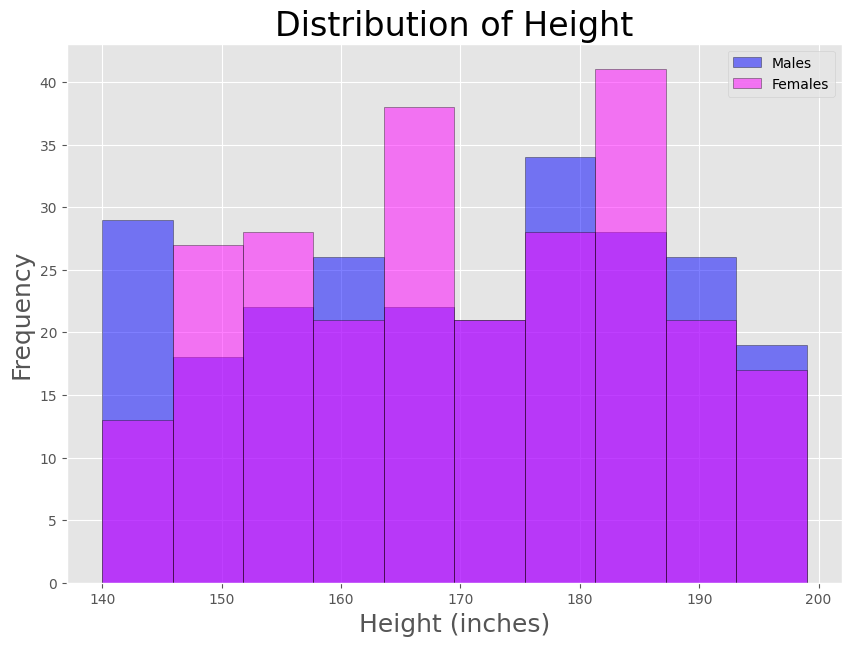

In [30]:
df[df['Gender'] == 'Male'].Height.plot(kind='hist', color='blue', edgecolor='black', alpha=0.5, figsize=(10, 7))
df[df['Gender'] == 'Female'].Height.plot(kind='hist', color='magenta', edgecolor='black', alpha=0.5, figsize=(10, 7))
plt.legend(labels=['Males', 'Females'])
plt.title('Distribution of Height', size=24)
plt.xlabel('Height (inches)', size=18)
plt.ylabel('Frequency', size=18);


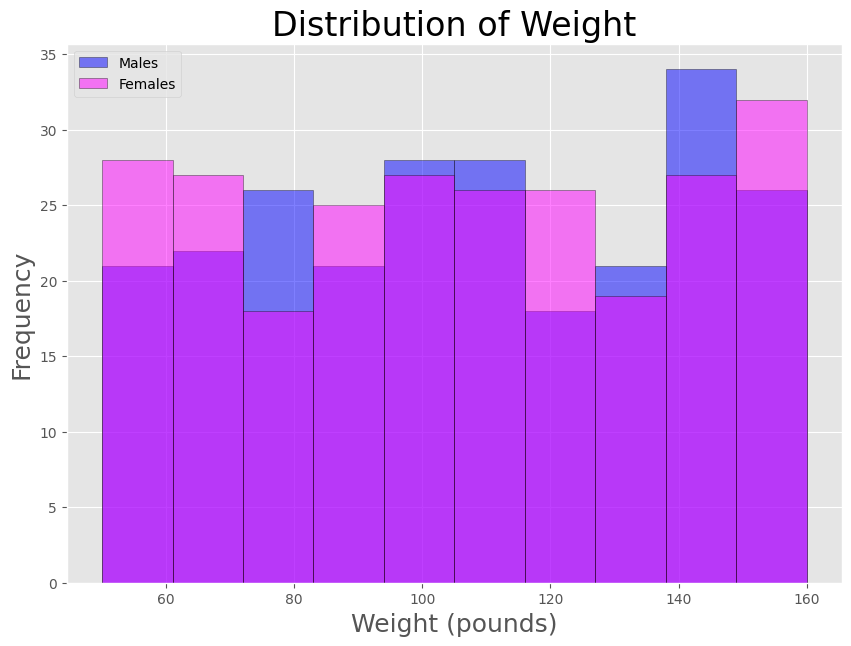

In [32]:
# histogram of the weight - males and females

df[df['Gender'] == 'Male'].Weight.plot(kind='hist', color='blue', edgecolor='black', alpha=0.5, figsize=(10, 7))
df[df['Gender'] == 'Female'].Weight.plot(kind='hist', color='magenta', edgecolor='black', alpha=0.5, figsize=(10, 7))
plt.legend(labels=['Males', 'Females'])
plt.title('Distribution of Weight', size=24)
plt.xlabel('Weight (pounds)', size=18)
plt.ylabel('Frequency', size=18);

In [33]:
# Descriptive statistics male
statistics_male = df[df['Gender'] == 'Male'].describe()
statistics_male.rename(columns=lambda x: x + '_male', inplace=True)
# Descriptive statistics female
statistics_female = df[df['Gender'] == 'Female'].describe()
statistics_female.rename(columns=lambda x: x + '_female', inplace=True)
# Dataframe that contains statistics for both male and female
statistics = pd.concat([statistics_male, statistics_female], axis=1)

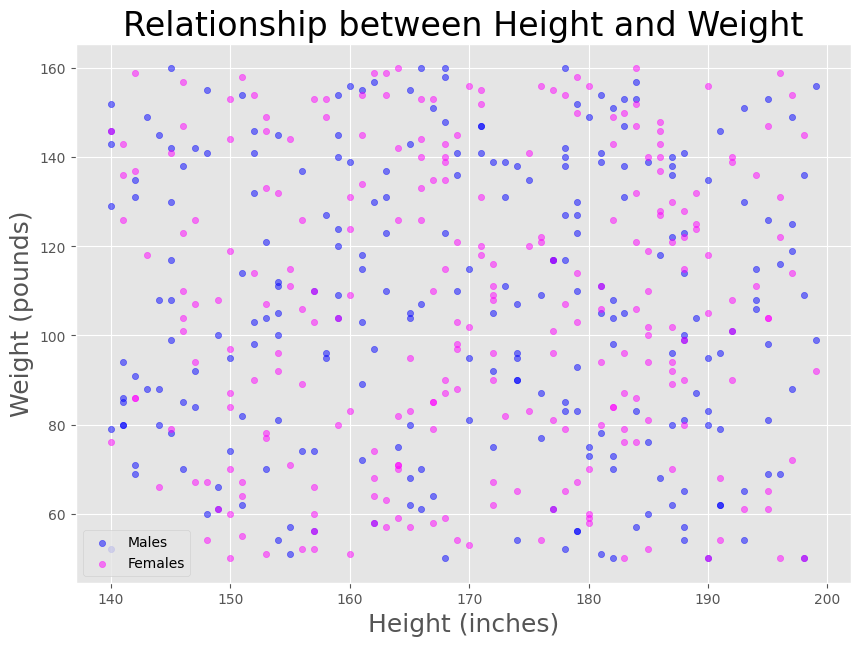

In [34]:
# Scatter plot of Height and Weight
ax1 = df[df['Gender'] == 'Male'].plot(kind='scatter', x='Height', y='Weight', color='blue', alpha=0.5, figsize=(10, 7))
df[df['Gender'] == 'Female'].plot(kind='scatter', x='Height', y='Weight', color='magenta', alpha=0.5, figsize=(10 ,7), ax=ax1)
plt.legend(labels=['Males', 'Females'])
plt.title('Relationship between Height and Weight', size=24)
plt.xlabel('Height (inches)', size=18)
plt.ylabel('Weight (pounds)', size=18);

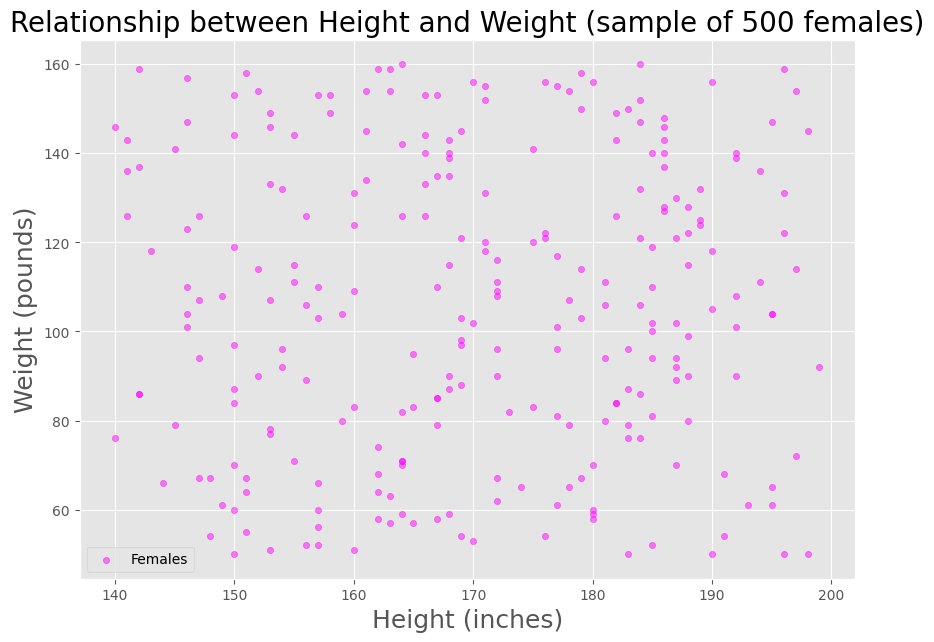

In [37]:
# Scatter plot of 500 females
sample_females = df[df['Gender'] == 'Female']
sample_females.plot(kind='scatter', x='Height', y='Weight', color='magenta', alpha=0.5, figsize=(10, 7))
plt.legend(labels=['Females'])
plt.title('Relationship between Height and Weight (sample of 500 females)', size=20)
plt.xlabel('Height (inches)', size=18)
plt.ylabel('Weight (pounds)', size=18);

In [38]:
import numpy as np
# best fit polynomials

df_males = df[df['Gender'] == 'Male']
df_females = df[df['Gender'] == 'Female']

# polynomial - males
male_fit = np.polyfit(df_males.Height, df_males.Weight, 1)
# array([ 5.96177381, -224.49884071])
# polynomial - females
female_fit = np.polyfit(df_females.Height, df_females.Weight, 1)
# array([ 5.99404661, -246.01326575])

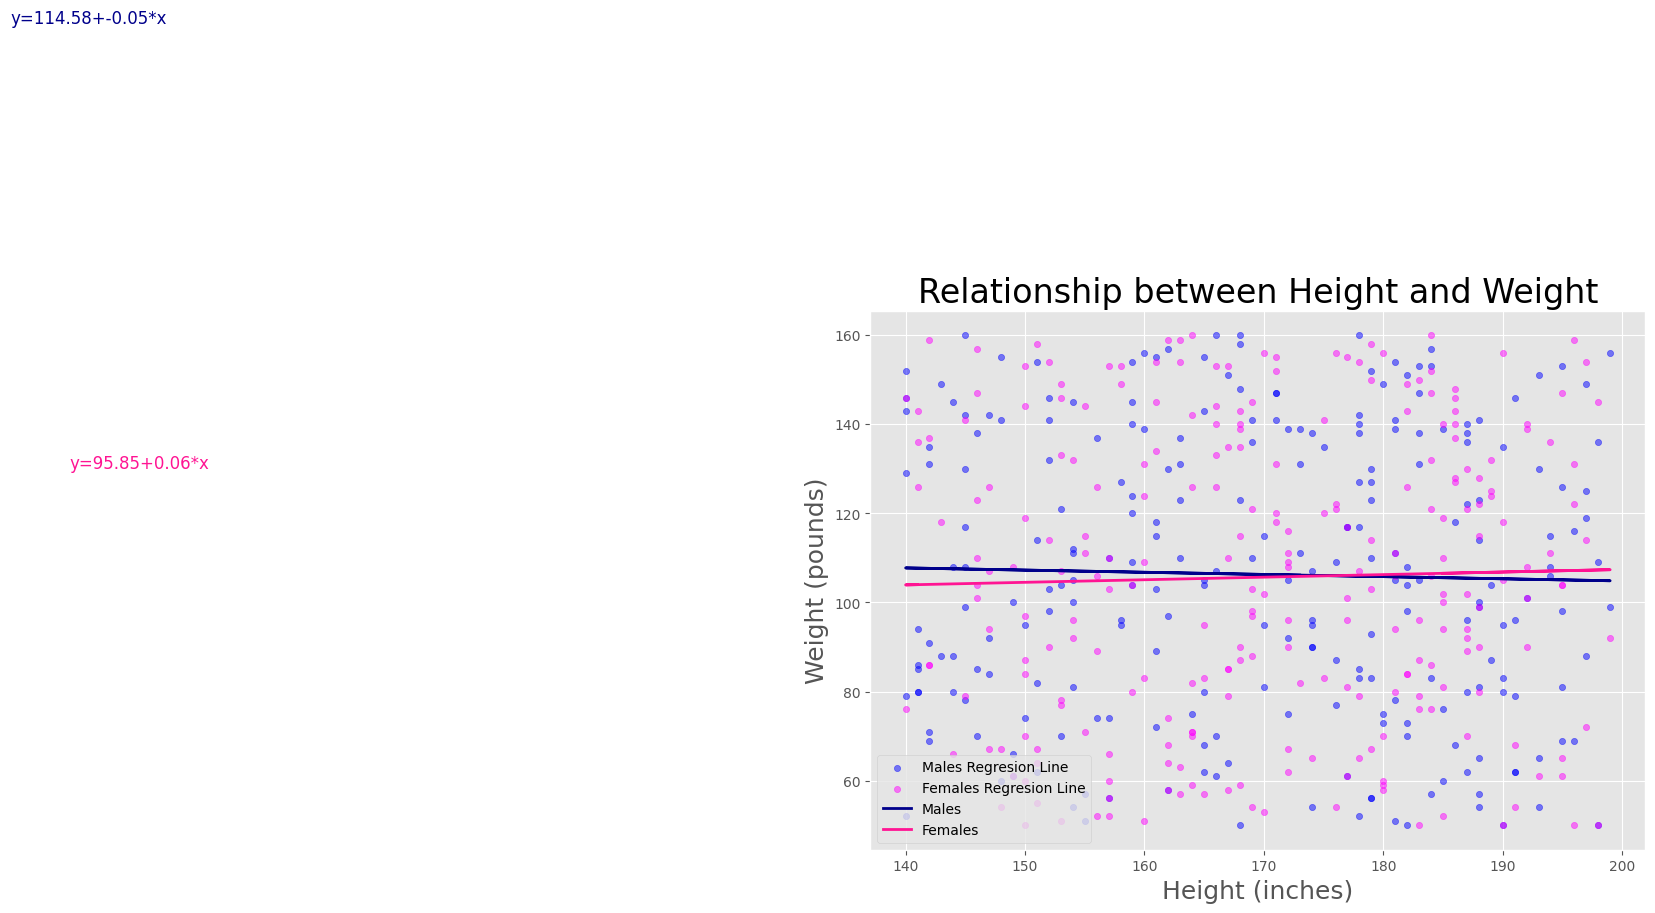

In [39]:
# scatter plots and regression lines

 # males and females dataframes
df_males = df[df['Gender'] == 'Male']
df_females = df[df['Gender'] == 'Female']
# Scatter plots.
ax1 = df_males.plot(kind='scatter', x='Height', y='Weight', color='blue', alpha=0.5,figsize=(10, 7))
df_females.plot(kind='scatter', x='Height', y='Weight', color='magenta', alpha=0.5, figsize=(10,7), ax=ax1)
# regression lines
plt.plot(df_males.Height, male_fit[0] * df_males.Height + male_fit[1], color='darkblue',linewidth=2)
plt.plot(df_females.Height, female_fit[0] * df_females.Height + female_fit[1],color='deeppink', linewidth=2)

# regression equations
plt.text(65, 230, 'y={:.2f}+{:.2f}*x'.format(male_fit[1], male_fit[0]), color='darkblue',size=12)
plt.text(70, 130, 'y={:.2f}+{:.2f}*x'.format(female_fit[1], female_fit[0]), color='deeppink',size=12)

# legend, title and labels.
plt.legend(labels=['Males Regresion Line', 'Females Regresion Line', 'Males', 'Females'])
plt.title('Relationship between Height and Weight', size=24)
plt.xlabel('Height (inches)', size=18)
plt.ylabel('Weight (pounds)', size=18);

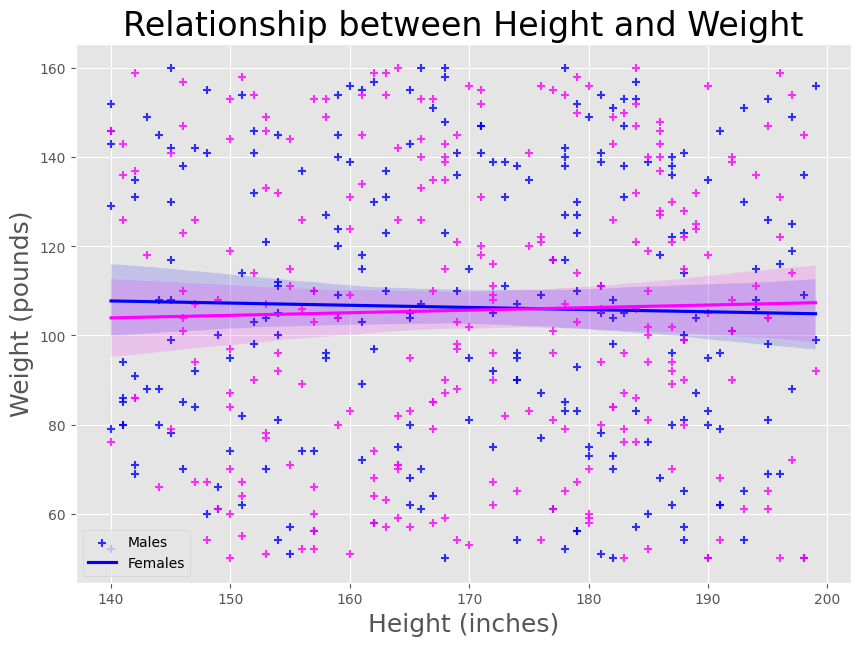

In [40]:
import seaborn as sns
# regression plot using seaborn
fig = plt.figure(figsize=(10, 7))
sns.regplot(x=df_males.Height, y=df_males.Weight, color='blue', marker='+')
sns.regplot(x=df_females.Height, y=df_females.Weight, color='magenta', marker='+')

# Legend, title and labels.
plt.legend(labels=['Males', 'Females'])
plt.title('Relationship between Height and Weight', size=24)
plt.xlabel('Height (inches)', size=18)
plt.ylabel('Weight (pounds)', size=18);

In [41]:
from sklearn.linear_model import LinearRegression
df_males = df[df['Gender'] == 'Male']

# create linear regression object
lr_males = LinearRegression()

# fit linear regression
lr_males.fit(df_males[['Height']], df_males['Weight'])

# get the slope and intercept of the line best fit
print(lr_males.intercept_)
# -224.49884070545772

print(lr_males.coef_)
# 5.96177381

df_females = df[df['Gender'] == 'Female']

# create linear regression object
lr_females = LinearRegression()

# fit linear regression
lr_females.fit(df_females[['Height']], df_females['Weight'])

# get the slope and intercept of the line best fit
print(lr_females.intercept_)
# -246.01326574667277

print(lr_females.coef_)
# 5.99404661

114.58397655987221
[-0.04874589]
95.85267170072629
[0.05783654]


In [43]:
df_females = df[df['Gender'] == 'Female']
# fit the model using numpy
female_fit = np.polyfit(df_females.Height, df_females.Weight, 1)
# predictions using numpy
print(np.polyval(female_fit, [60]))
# [113.62953114]

# fit the model using scikit learn
lr_females = LinearRegression()
lr_females.fit(df_females[['Height']], df_females['Weight'])

# predictions using scikit learn
print(lr_females.predict([[60]]))
# [113.62953114]

[99.32286436]
[99.32286436]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [44]:
# dataframe containing only females
df_females = df[df['Gender'] == 'Female']

# correlation coefficients
df_females.corr()

<ipython-input-44-e669fc110965>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_females.corr()


,Height,Weight,Index
Height,1.000000,0.027569,-0.362132
Weight,0.027569,1.000000,0.819280
Index,-0.362132,0.819280,1.000000


In [45]:
# dataframe containing only males
df_males = df[df['Gender'] == 'Male']

# correlation coefficients
df_males.corr()

<ipython-input-45-9218ef4d1837>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_males.corr()


,Height,Weight,Index
Height,1.000000,-0.026133,-0.476934
Weight,-0.026133,1.000000,0.790888
Index,-0.476934,0.790888,1.000000


In [46]:
from scipy import stats

# dataframe containing only females
df_females = df[df['Gender'] == 'Female']

# pearson correlation coefficient and p-value
pearson_coef, p_value = stats.pearsonr(df_females.Height, df_females.Weight)

print(pearson_coef)
# 0.849608591418601

# dataframe containing only males
df_males = df[df['Gender'] == 'Male']

# pearson correlation coefficient and p-value
pearson_coef, p_value = stats.pearsonr(df_males.Height, df_males.Weight)

print(pearson_coef)
# 0.8629788486163176

0.027568624092019232
-0.026132882097317366
